In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Rice_image_dataset/Rice_Image_Dataset"

In [ ]:
import os
labels = os.listdir(path)
labels

['Basmathi', 'Ipsala', 'Karacadag', 'Arborio', 'Jasmine']

Label: Basmathi


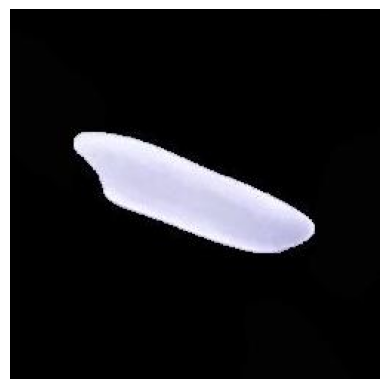

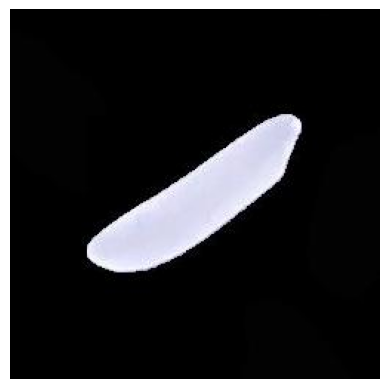

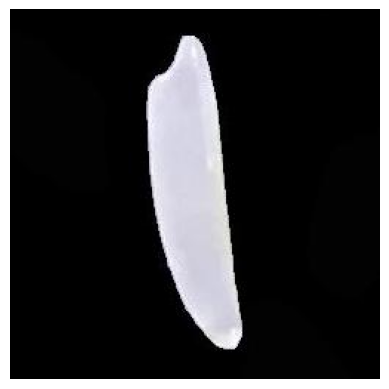

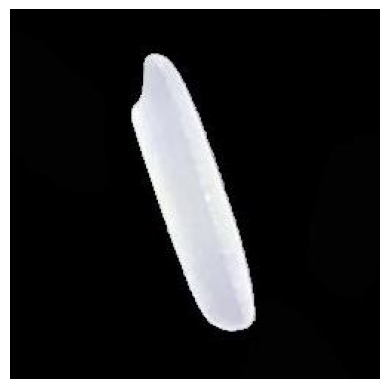

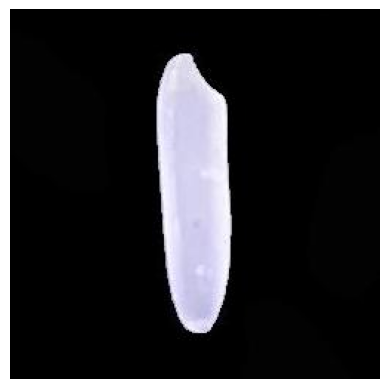

--------------------
Label: Ipsala


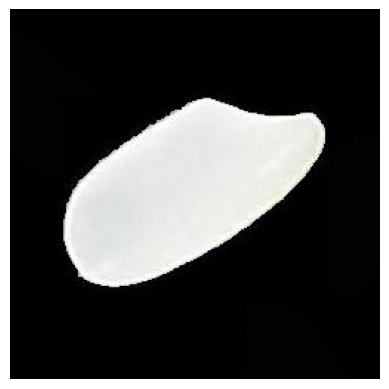

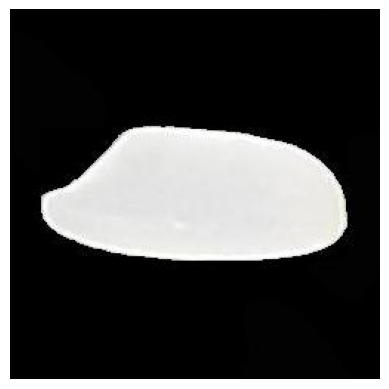

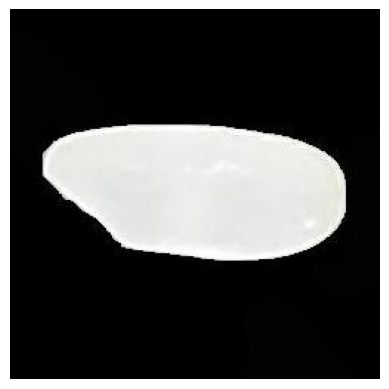

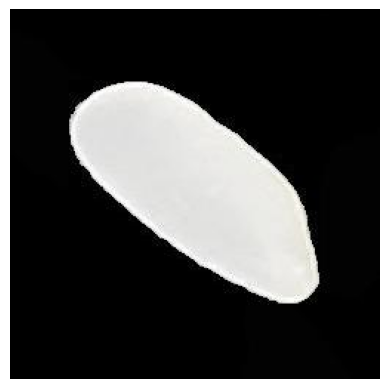

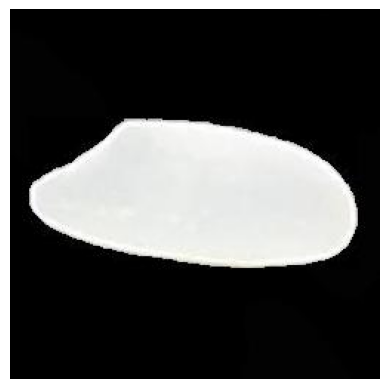

--------------------
Label: Karacadag


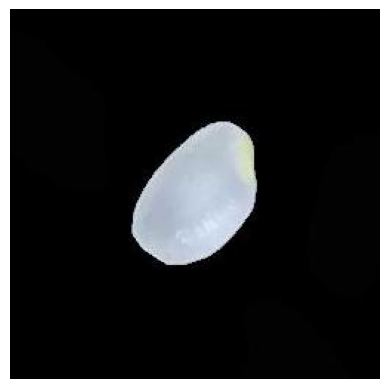

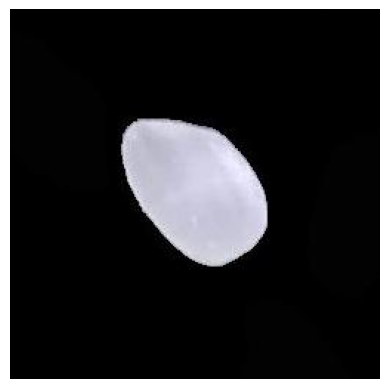

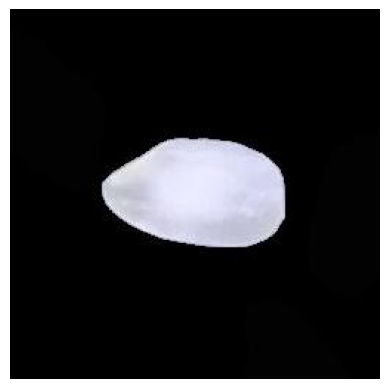

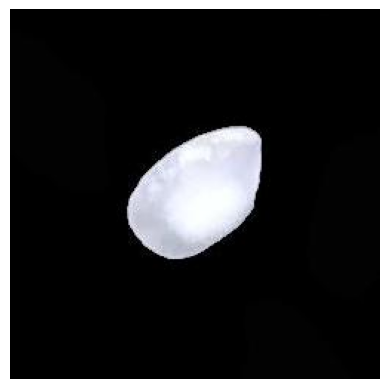

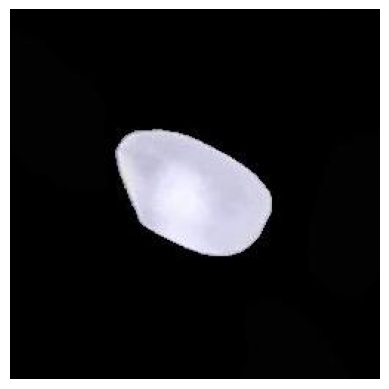

--------------------
Label: Arborio


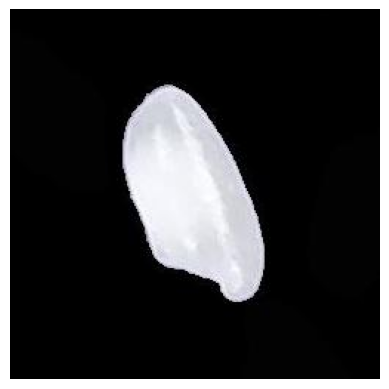

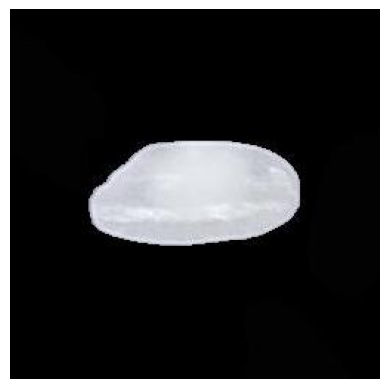

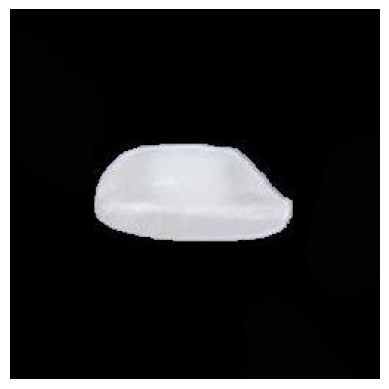

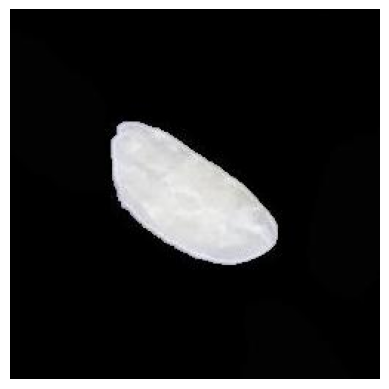

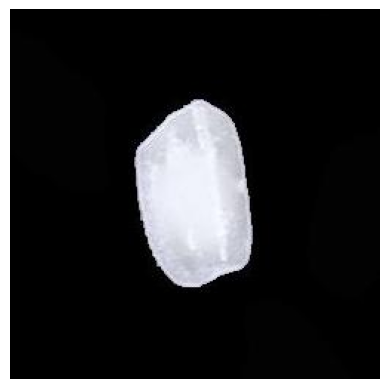

--------------------
Label: Jasmine


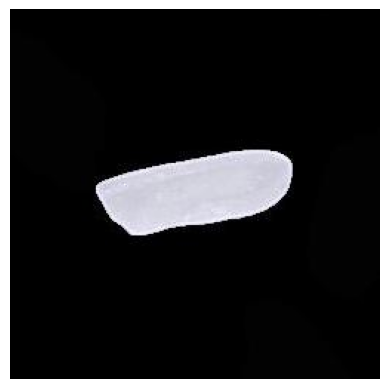

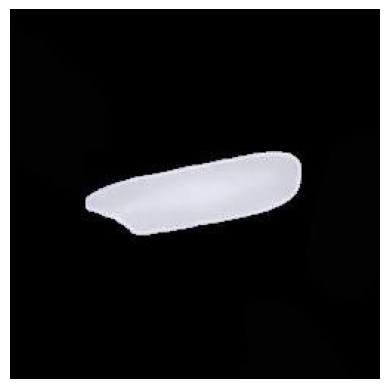

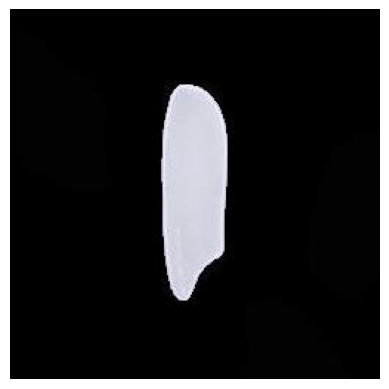

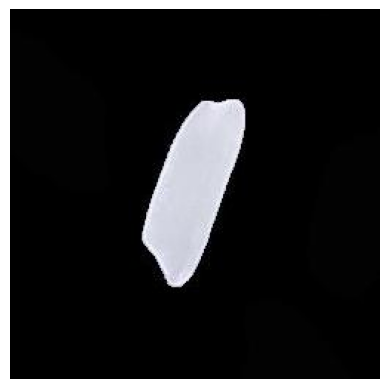

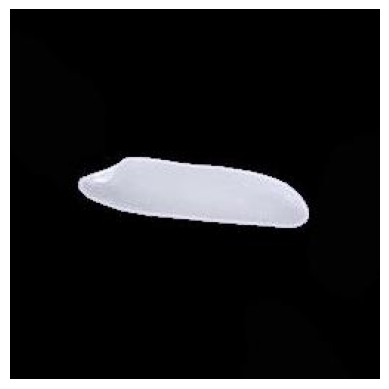

--------------------


In [ ]:
import matplotlib.pyplot as plt
import cv2
for label in labels:
  print(f"Label: {label}")
  image_count = 0
  for image_name in os.listdir(os.path.join(path, label)):
      if image_count >=5:
          break
      image_path = os.path.join(path, label, image_name)
      try:
          img = cv2.imread(image_path)
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert from BGR to RGB
          plt.imshow(img)
          plt.axis('off')
          plt.show()
          image_count += 1
      except Exception as e:
          print(f"Error loading image {image_path}: {e}")
  print("-" * 20)

Label: Basmathi


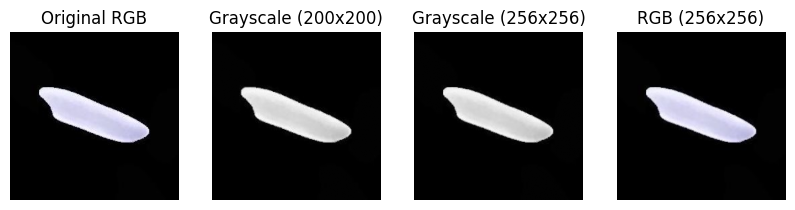

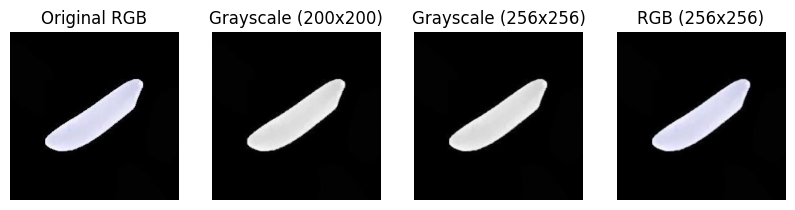

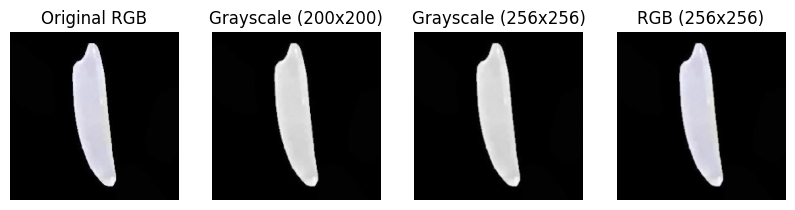

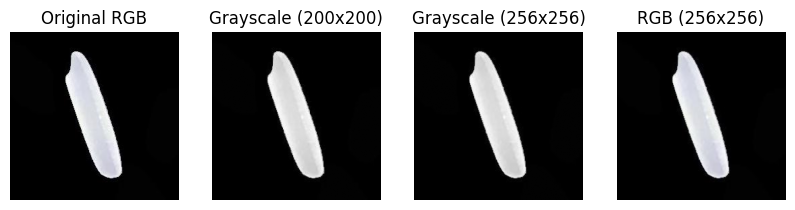

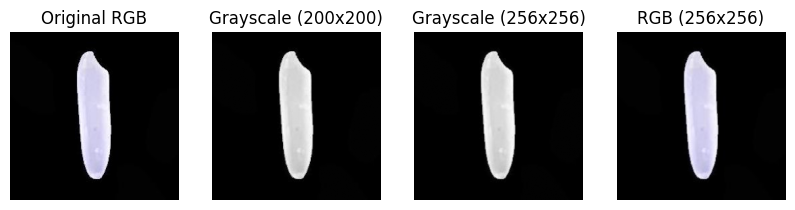

--------------------
Label: Ipsala


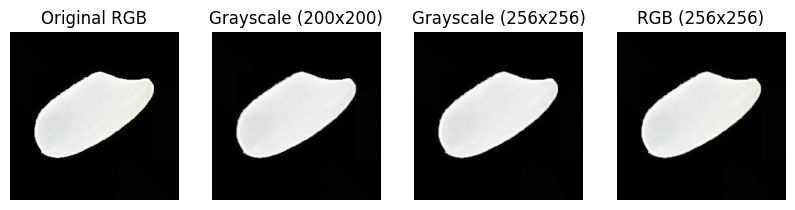

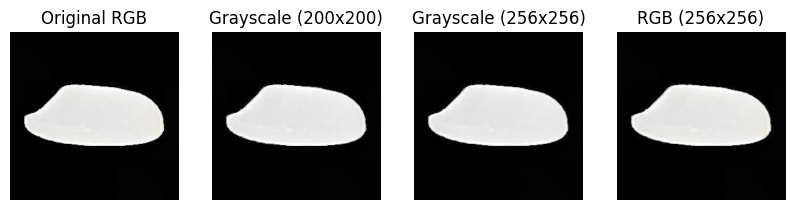

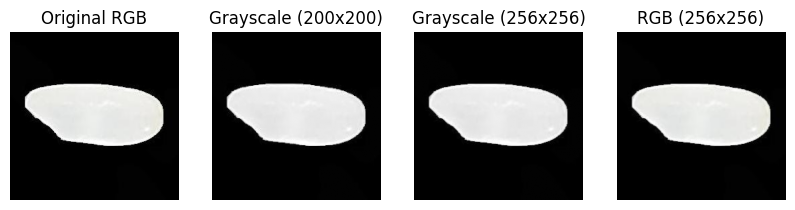

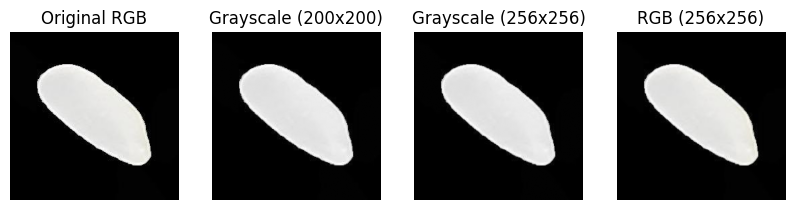

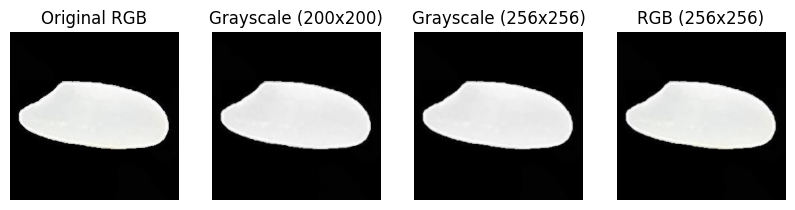

--------------------
Label: Karacadag


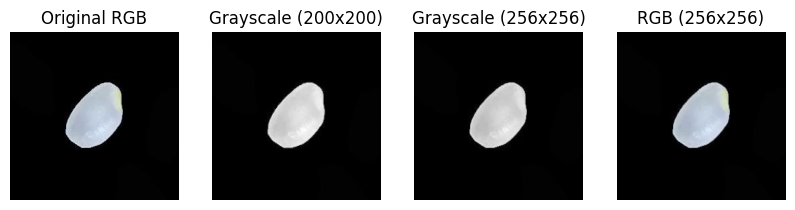

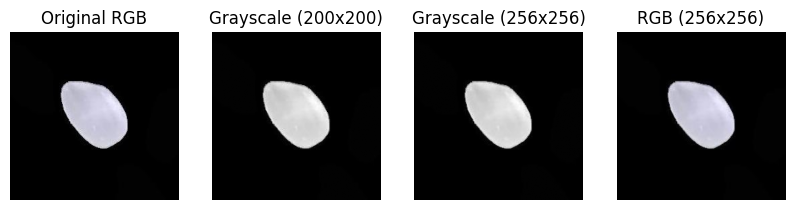

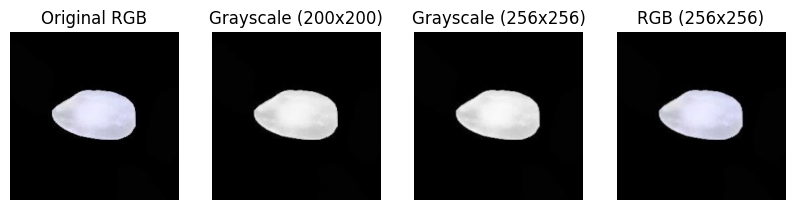

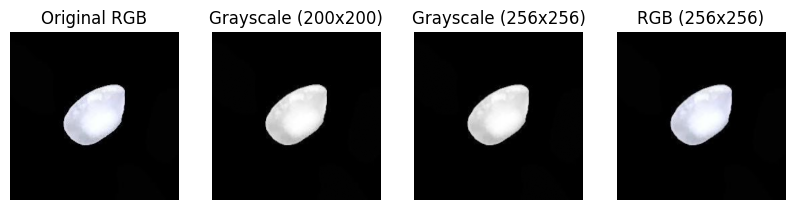

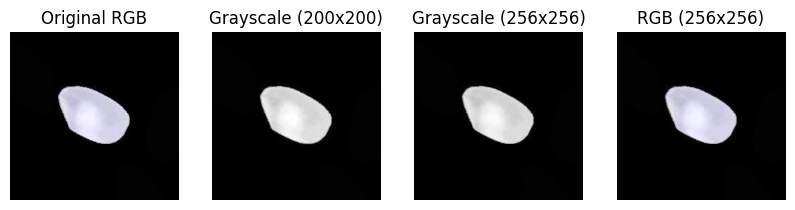

--------------------
Label: Arborio


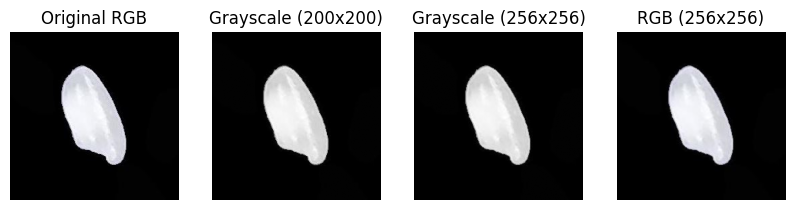

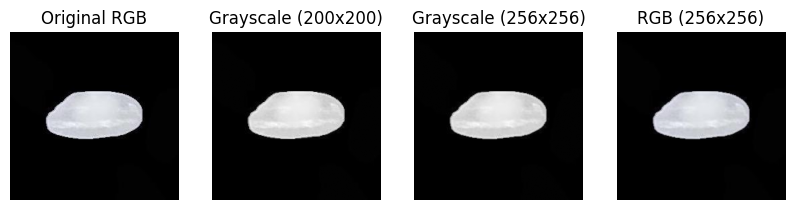

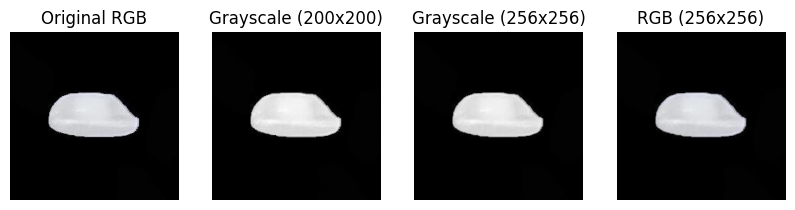

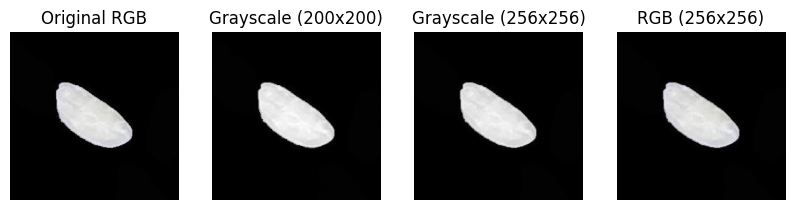

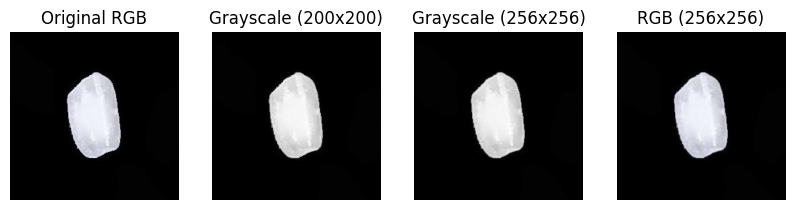

--------------------
Label: Jasmine


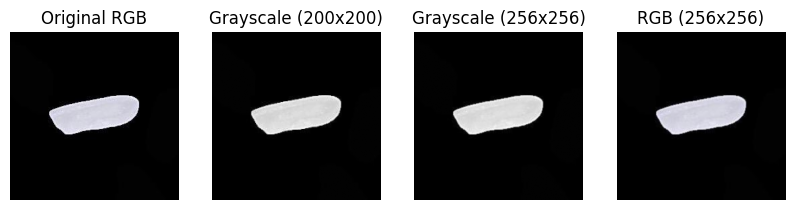

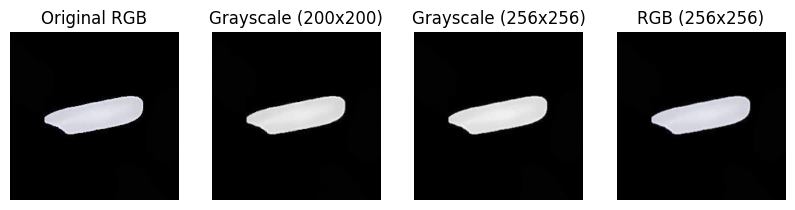

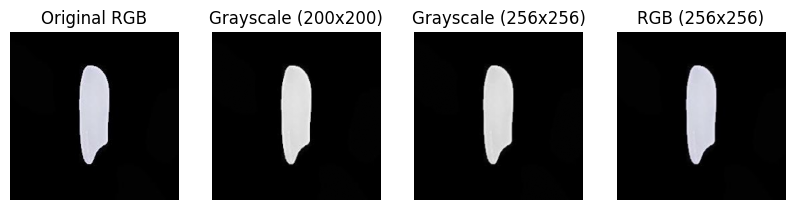

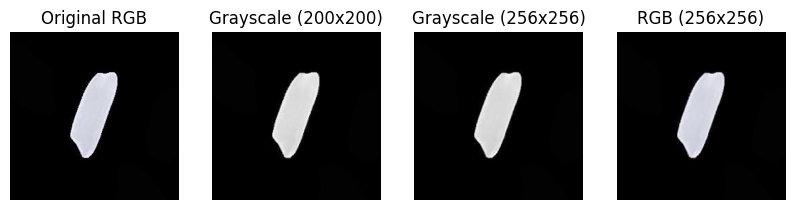

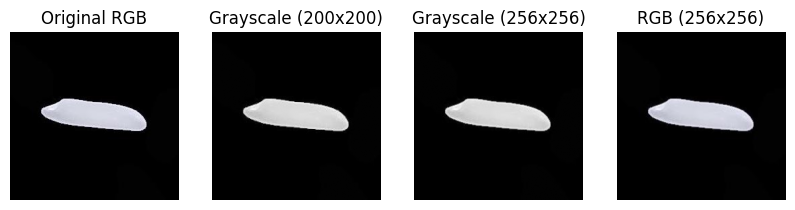

--------------------


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


for label in labels:
  print(f"Label: {label}")
  image_count = 0
  for image_name in os.listdir(os.path.join(path, label)):
      if image_count >= 5:
          break
      image_path = os.path.join(path, label, image_name)
      try:
          img = cv2.imread(image_path)
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

          # Grayscale conversion
          gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

          # Resize images
          gray_img_200 = cv2.resize(gray_img, (200, 200))
          gray_img_256 = cv2.resize(gray_img, (256, 256))
          img_200 = cv2.resize(img, (200, 200))
          img_256 = cv2.resize(img, (256,256))

          # Display images
          plt.figure(figsize=(10, 5))

          plt.subplot(1, 4, 1)
          plt.imshow(img)
          plt.title('Original RGB')
          plt.axis('off')

          plt.subplot(1, 4, 2)
          plt.imshow(gray_img_200, cmap='gray')
          plt.title('Grayscale (200x200)')
          plt.axis('off')

          plt.subplot(1, 4, 3)
          plt.imshow(gray_img_256, cmap='gray')
          plt.title('Grayscale (256x256)')
          plt.axis('off')

          plt.subplot(1,4,4)
          plt.imshow(img_256)
          plt.title('RGB (256x256)')
          plt.axis('off')

          plt.show()

          image_count += 1
      except Exception as e:
          print(f"Error loading image {image_path}: {e}")
  print("-" * 20)


In [ ]:
import os
import random
from shutil import copyfile

def split_dataset(source_dir, train_dir, val_dir, test_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    """Splits a dataset into train, validation, and test sets."""

    if train_ratio + val_ratio + test_ratio != 1.0:
        raise ValueError("Ratios must sum to 1.0")

    for label in os.listdir(source_dir):
        label_source = os.path.join(source_dir, label)
        label_train = os.path.join(train_dir, label)
        label_val = os.path.join(val_dir, label)
        label_test = os.path.join(test_dir, label)

        os.makedirs(label_train, exist_ok=True)
        os.makedirs(label_val, exist_ok=True)
        os.makedirs(label_test, exist_ok=True)

        images = [f for f in os.listdir(label_source) if os.path.isfile(os.path.join(label_source, f))]
        random.shuffle(images)
        num_images = len(images)

        num_train = int(num_images * train_ratio)
        num_val = int(num_images * val_ratio)
        num_test = num_images - num_train - num_val  # Ensure all images are used

        for i, image in enumerate(images):
            source_path = os.path.join(label_source, image)
            if i < num_train:
                destination_path = os.path.join(label_train, image)
            elif i < num_train + num_val:
                destination_path = os.path.join(label_val, image)
            else:
                destination_path = os.path.join(label_test, image)
            copyfile(source_path, destination_path)

# Example usage (replace with your actual paths)
source_directory = "/content/drive/MyDrive/Rice_image_dataset/Rice_Image_Dataset"
train_directory = "/content/drive/MyDrive/Rice_image_dataset/train"
val_directory = "/content/drive/MyDrive/Rice_image_dataset/val"
test_directory = "/content/drive/MyDrive/Rice_image_dataset/test"

split_dataset(source_directory, train_directory, val_directory, test_directory)


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Rice_image_dataset/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)


validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Rice_image_dataset/val',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Rice_image_dataset/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1407 images belonging to 5 classes.
Found 301 images belonging to 5 classes.
Found 303 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN model
model = keras.Sequential(
    [
        keras.Input(shape=(256, 256, 3)),  # Input shape
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),  # Dropout for regularization
        layers.Dense(5, activation="softmax"),  # Output layer (5 classes)
    ]
)

In [ ]:
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 48s 930ms/step - accuracy: 0.2818 - loss: 1.6081 - val_accuracy: 0.5449 - val_loss: 1.1004
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 69s 779ms/step - accuracy: 0.6029 - loss: 0.9735 - val_accuracy: 0.6877 - val_loss: 0.7308
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 39s 899ms/step - accuracy: 0.7225 - loss: 0.7342 - val_accuracy: 0.7309 - val_loss: 0.6620
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 818ms/step - accuracy: 0.7492 - loss: 0.5996 - val_accuracy: 0.7973 - val_loss: 0.4839
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 757ms/step - accuracy: 0.7912 - loss: 0.5374 - val_accuracy: 0.8239 - val_loss: 0.4628
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 32s 723ms/step - accuracy: 0.8466 - loss: 0.4522 - val_accuracy: 0.8505 - val_loss: 0.3928
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 31s 715ms/step - accuracy: 0.8197 - loss: 0.4259 - val_accuracy: 0.8106 - val_loss: 0.4685
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 812ms/step - accuracy: 0.8364 - loss: 0.4457 - val_accu

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 676ms/step - accuracy: 0.8544 - loss: 0.3463
Test Loss: 0.2673
Test Accuracy: 0.8977


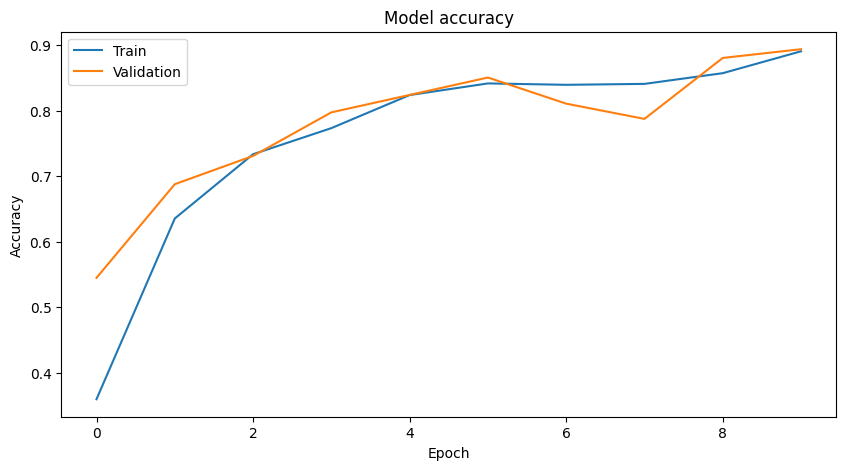

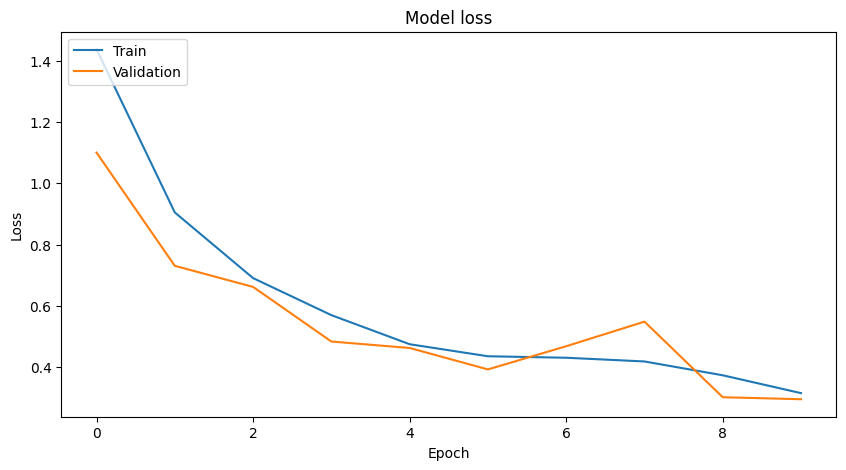

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │     1,230,085 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,748,433 (14.30 MB)

 Trainable params: 1,249,477 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,498,956 (9.53 MB)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 486ms/step
              precision    recall  f1-score   support

     Arborio       0.91      0.80      0.85        60
    Basmathi       0.95      0.90      0.93        62
      Ipsala       1.00      1.00      1.00        60
     Jasmine       0.79      0.80      0.80        61
   Karacadag       0.86      0.98      0.91        60

    accuracy                           0.90       303
   macro avg       0.90      0.90      0.90       303
weighted avg       0.90      0.90      0.90       303



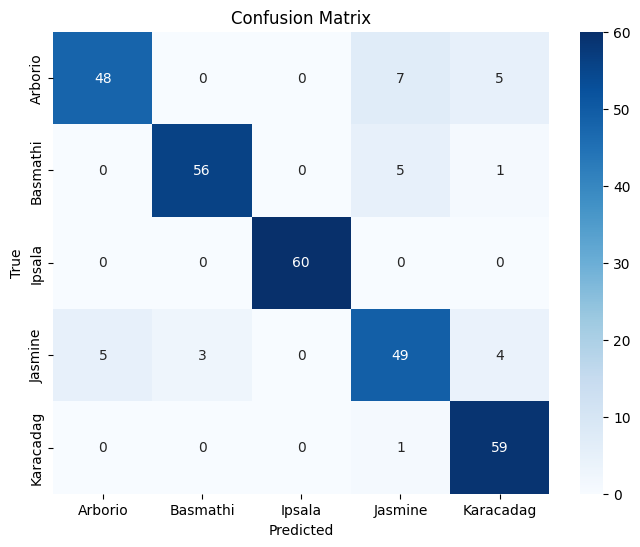

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Saving Ipsala (988).jpg to Ipsala (988).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted rice type for Ipsala (988).jpg: Ipsala


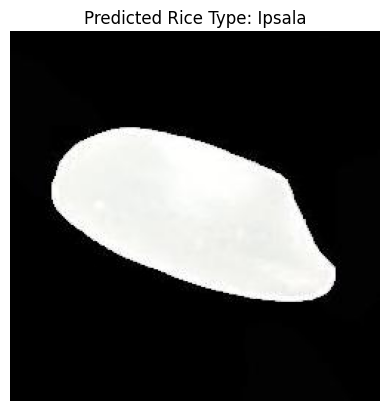

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2
import numpy as np

def predict_rice_type(image_path):
    try:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (256, 256))
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        prediction = model.predict(img)
        predicted_class_index = np.argmax(prediction)

        class_labels = list(test_generator.class_indices.keys())

        predicted_label = class_labels[predicted_class_index]
        return predicted_label
    except Exception as e:
        print(f"Error predicting rice type: {e}")
        return None


uploaded = files.upload()
for fn in uploaded.keys():
    image_path = fn
    predicted_rice_type = predict_rice_type(image_path)

    if predicted_rice_type:
        print(f"Predicted rice type for {image_path}: {predicted_rice_type}")

        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f'Predicted Rice Type: {predicted_rice_type}')
        plt.axis('off')
        plt.show()
    else:
        print(f"Could not predict rice type for {image_path}")

Saving Arborio (975).jpg to Arborio (975).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted rice type for Arborio (975).jpg: Arborio


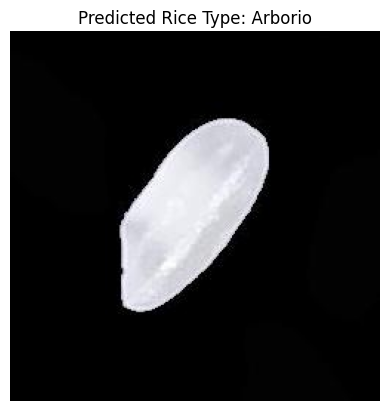

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2
import numpy as np

def predict_rice_type(image_path):
    try:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (256, 256))
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        prediction = model.predict(img)
        predicted_class_index = np.argmax(prediction)

        class_labels = list(test_generator.class_indices.keys())

        predicted_label = class_labels[predicted_class_index]
        return predicted_label
    except Exception as e:
        print(f"Error predicting rice type: {e}")
        return None


uploaded = files.upload()
for fn in uploaded.keys():
    image_path = fn
    predicted_rice_type = predict_rice_type(image_path)

    if predicted_rice_type:
        print(f"Predicted rice type for {image_path}: {predicted_rice_type}")

        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f'Predicted Rice Type: {predicted_rice_type}')
        plt.axis('off')
        plt.show()
    else:
        print(f"Could not predict rice type for {image_path}")

Saving basmati (974).jpg to basmati (974).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted rice type for basmati (974).jpg: Basmathi


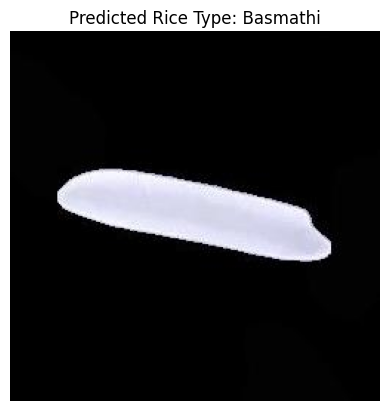

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2
import numpy as np

def predict_rice_type(image_path):
    try:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (256, 256))
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        prediction = model.predict(img)
        predicted_class_index = np.argmax(prediction)

        class_labels = list(test_generator.class_indices.keys())

        predicted_label = class_labels[predicted_class_index]
        return predicted_label
    except Exception as e:
        print(f"Error predicting rice type: {e}")
        return None


uploaded = files.upload()
for fn in uploaded.keys():
    image_path = fn
    predicted_rice_type = predict_rice_type(image_path)

    if predicted_rice_type:
        print(f"Predicted rice type for {image_path}: {predicted_rice_type}")

        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f'Predicted Rice Type: {predicted_rice_type}')
        plt.axis('off')
        plt.show()
    else:
        print(f"Could not predict rice type for {image_path}")

Saving Jasmine (963).jpg to Jasmine (963).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted rice type for Jasmine (963).jpg: Jasmine


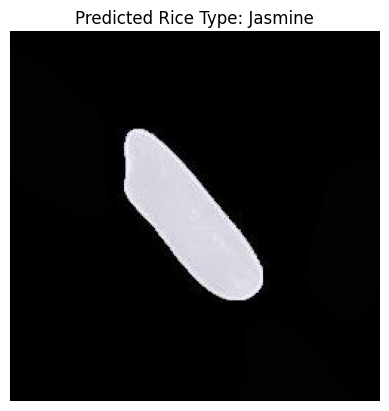

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2
import numpy as np

def predict_rice_type(image_path):
    try:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (256, 256))
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        prediction = model.predict(img)
        predicted_class_index = np.argmax(prediction)

        class_labels = list(test_generator.class_indices.keys())

        predicted_label = class_labels[predicted_class_index]
        return predicted_label
    except Exception as e:
        print(f"Error predicting rice type: {e}")
        return None


uploaded = files.upload()
for fn in uploaded.keys():
    image_path = fn
    predicted_rice_type = predict_rice_type(image_path)

    if predicted_rice_type:
        print(f"Predicted rice type for {image_path}: {predicted_rice_type}")

        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f'Predicted Rice Type: {predicted_rice_type}')
        plt.axis('off')
        plt.show()
    else:
        print(f"Could not predict rice type for {image_path}")

Saving Karacadag (743).jpg to Karacadag (743).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted rice type for Karacadag (743).jpg: Karacadag


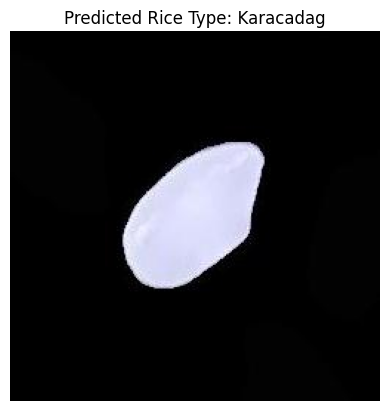

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2
import numpy as np

def predict_rice_type(image_path):
    try:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (256, 256))
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        prediction = model.predict(img)
        predicted_class_index = np.argmax(prediction)

        class_labels = list(test_generator.class_indices.keys())

        predicted_label = class_labels[predicted_class_index]
        return predicted_label
    except Exception as e:
        print(f"Error predicting rice type: {e}")
        return None


uploaded = files.upload()
for fn in uploaded.keys():
    image_path = fn
    predicted_rice_type = predict_rice_type(image_path)

    if predicted_rice_type:
        print(f"Predicted rice type for {image_path}: {predicted_rice_type}")

        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f'Predicted Rice Type: {predicted_rice_type}')
        plt.axis('off')
        plt.show()
    else:
        print(f"Could not predict rice type for {image_path}")

In [ ]:
from statsmodels.stats.weightstats import ztest

sample_accuracies = [0.82, 0.79, 0.85, 0.81, 0.83]
value = 0.8

z_statistic, p_value = ztest(sample_accuracies, value=value)

print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average accuracy is significantly different from 0.8.")
else:
    print("Fail to reject the null hypothesis: There's no significant difference in average accuracy from 0.8.")


Z-statistic: 1.9999999999999933
P-value: 0.0455002638963591
Reject the null hypothesis: The average accuracy is significantly different from 0.8.


In [ ]:
from scipy import stats

sample_accuracies = [0.82, 0.79, 0.85, 0.81, 0.83]
value = 0.8

t_statistic, p_value = stats.ttest_1samp(sample_accuracies, value)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average accuracy is significantly different from 0.8.")
else:
    print("Fail to reject the null hypothesis: There's no significant difference in average accuracy from 0.8.")


T-statistic: 1.9999999999999933
P-value: 0.11611652351681642
Fail to reject the null hypothesis: There's no significant difference in average accuracy from 0.8.


In [ ]:
observed_frequencies = [10, 15, 20, 25]
expected_frequencies = [14, 17.5, 21, 27.5]


total_observed = sum(observed_frequencies)

expected_frequencies = [(freq / sum(expected_frequencies)) * total_observed for freq in expected_frequencies]

chi2_statistic, p_value = stats.chisquare(observed_frequencies, f_exp=expected_frequencies)

print(f"Chi-square statistic: {chi2_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis: There's a significant difference between observed and expected frequencies.")
else:
  print("Fail to reject the null hypothesis: No significant difference between observed and expected frequencies.")

Chi-square statistic: 0.5998763141620285
P-value: 0.8964606878074289
Fail to reject the null hypothesis: No significant difference between observed and expected frequencies.


In [ ]:
from statsmodels.stats.weightstats import ztest

group1 = [85, 90, 92, 88, 95]
group2 = [80, 82, 85, 78, 83]

z_statistic, p_value = ztest(group1, group2)

print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference between the groups.")


Z-statistic: 4.022870397928839
P-value: 5.749313666325864e-05
Reject the null hypothesis: There is a statistically significant difference between the groups.
